# **Credit Card Fraud Detection**
Anonymized credit card transactions labeled as fraudulent or genuine

**Content**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 2 frauds out of 3973transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.0005% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Dataset**

In [2]:
dataset=pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
dataset.shape

(3973, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

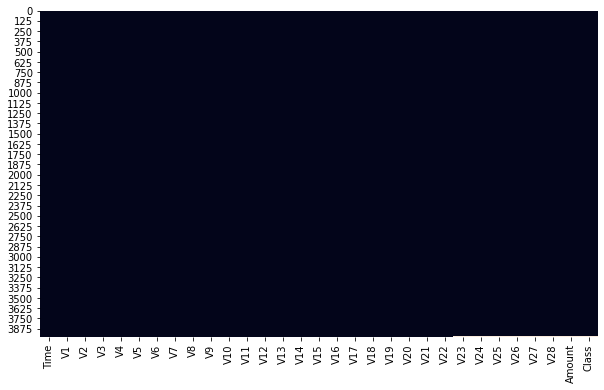

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),cbar=False)

In [7]:
feature_nan=[feature for feature in dataset.columns if dataset[feature].isnull().values.any()]
for feature in feature_nan:
  print(feature,dataset[feature].isnull().values.sum())

V23 1
V24 1
V25 1
V26 1
V27 1
V28 1
Amount 1
Class 1


In [8]:
data=dataset.dropna()

In [9]:
y=data['Class']
X=data.drop(['Class'],axis=1)

In [10]:
print(X)

      Time        V1        V2        V3  ...       V26       V27       V28  Amount
0        0 -1.359807 -0.072781  2.536347  ... -0.189115  0.133558 -0.021053  149.62
1        0  1.191857  0.266151  0.166480  ...  0.125895 -0.008983  0.014724    2.69
2        1 -1.358354 -1.340163  1.773209  ... -0.139097 -0.055353 -0.059752  378.66
3        1 -0.966272 -0.185226  1.792993  ... -0.221929  0.062723  0.061458  123.50
4        2 -1.158233  0.877737  1.548718  ...  0.502292  0.219422  0.215153   69.99
...    ...       ...       ...       ...  ...       ...       ...       ...     ...
3967  3610  0.816969 -0.280175  1.354064  ... -0.089374 -0.026460  0.038635  150.91
3968  3617  1.134592  0.252051  0.488592  ...  0.057976 -0.046611  0.012562   13.99
3969  3621 -1.338671  1.080974  1.291196  ...  0.230423 -0.119911  0.321847   27.43
3970  3622 -0.339728 -2.417449  0.975517  ... -0.231357 -0.049872  0.153526  730.32
3971  3623 -0.368639  0.947432  1.707755  ... -0.420518  0.033794  0.005996 

# **Exploratary Data Analysis**

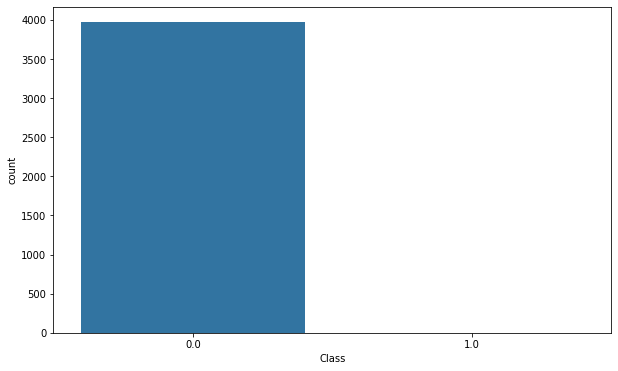

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['Class'])

In [12]:
dataset.Class.value_counts()

0.0    3970
1.0       2
Name: Class, dtype: int64

**we have total 3972 records total in our dataset among that 3970 are classified as Normal that is 0 and 2 are classified as Fraud that is 1.**

**Hence the ratio between the two classes are 1985:1 and it's huge difference.**

**If we will train our model on this dataset it will be baised towards Normal that is 0 category.**

**Hence it will not be efficient**

**So, we need to perform under Sampling on the dataset**

**Hence, we don't have null value in our dataset**

# **Under Sampling**

In [13]:
from imblearn.under_sampling import NearMiss

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
nm=NearMiss(n_neighbors=2)

In [ ]:
X_res,y_res=nm.fit_sample(X,y)

In [16]:
print(X_res.shape,y_res.shape)

(4, 30) (4,)


In [17]:
print(y_res)

[0. 0. 1. 1.]
